<a href="https://colab.research.google.com/github/afintchtr/pcd-neckband-hog/blob/main/P2_Kelompok_8_Tugas_Akhir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
import random
from tqdm import tqdm
import cv2
from skimage.feature import hog
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Read Image Data
Read data from Drive

## Get Access from Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Run for collaborator
#data_dir = "/content/drive/My Drive/Pengolahan Citra Digital/DatasetNeckbandB"

# Run for drive owner
data_dir = "/content/drive/My Drive/ILKOM/Semester 6/Tugas Akhir/Pengolahan Citra Digital/DatasetNeckbandB"
data_dir = pathlib.Path(data_dir)

In [ ]:
# Count total number of image will be read
image_count = len(list(data_dir.glob('*/*.bmp')))
print(image_count)

1948


## Read Image to Array

In [ ]:
all_images = []
labels = []

class1 = list(data_dir.glob('class1/*'))
for it in tqdm(range(0,len(class1))):
    cls = 'class1'
    img = cv2.imread(str(class1[it]))
    resized_img = resize(img, (48*1, 64*1))
    all_images.append(resized_img)
    labels.append(cls)

class2 = list(data_dir.glob('class2/*'))
for it in tqdm(range(0,len(class2))):
    cls = 'class2'
    img = cv2.imread(str(class2[it]))
    resized_img = resize(img, (48*1, 64*1))
    all_images.append(resized_img)
    labels.append(cls)

class3 = list(data_dir.glob('class3/*'))
for it in tqdm(range(0,len(class3))):
    cls = 'class3'
    img = cv2.imread(str(class3[it]))
    resized_img = resize(img, (48*1, 64*1))
    all_images.append(resized_img)
    labels.append(cls)

class4 = list(data_dir.glob('class4/*'))
for it in tqdm(range(0,len(class4))):
    cls = 'class4'
    img = cv2.imread(str(class4[it]))
    resized_img = resize(img, (48*1, 64*1))
    all_images.append(resized_img)
    labels.append(cls)

class5 = list(data_dir.glob('class5/*'))
for it in tqdm(range(0,len(class5))):
    cls = 'class5'
    img = cv2.imread(str(class5[it]))
    resized_img = resize(img, (48*1, 64*1))
    all_images.append(resized_img)
    labels.append(cls)

class6 = list(data_dir.glob('class6/*'))
for it in tqdm(range(0,len(class6))):
    cls = 'class6'
    img = cv2.imread(str(class6[it]))
    resized_img = resize(img, (48*1, 64*1))
    all_images.append(resized_img)
    labels.append(cls)

class7 = list(data_dir.glob('class7/*'))
for it in tqdm(range(0,len(class7))):
    cls = 'class7'
    img = cv2.imread(str(class7[it]))
    resized_img = resize(img, (48*1, 64*1))
    all_images.append(resized_img)
    labels.append(cls)

class8 = list(data_dir.glob('class8/*'))
for it in tqdm(range(0,len(class8))):
    cls = 'class8'
    img = cv2.imread(str(class8[it]))
    resized_img = resize(img, (48*1, 64*1))
    all_images.append(resized_img)
    labels.append(cls)

unidentified = list(data_dir.glob('class9/*'))
for it in tqdm(range(0,len(unidentified))):
    cls = 'unidentified'
    img = cv2.imread(str(unidentified[it]))
    resized_img = resize(img, (48*1, 64*1))
    all_images.append(resized_img)
    labels.append(cls)

100%|██████████| 320/320 [02:31<00:00,  2.11it/s]


# Train and Test Data
Split data into train data (70%) and test data (30%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(all_images, labels, test_size=0.3,stratify=labels)

In [ ]:
print('Training data and target sizes: \n{}, {}'.format(len(X_train), len(y_train)))
print('Test data and target sizes: \n{}, {}'.format(len(X_test), len(y_test)))

Training data and target sizes: 
1363, 1363
Test data and target sizes: 
585, 585


In [ ]:
# Find amount of class in train
import pandas as pd
pd.Series(y_train).value_counts().sort_index()

class1          183
class2          147
class3          185
class4          129
class5          104
class6          137
class7          136
class8          118
unidentified    224
dtype: int64

In [ ]:
# Find amount of class in test
pd.Series(y_test).value_counts().sort_index()

class1          79
class2          63
class3          79
class4          55
class5          45
class6          58
class7          59
class8          51
unidentified    96
dtype: int64

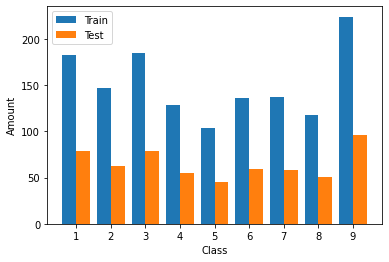

In [ ]:
train_num = [183, 147, 185, 129, 104, 136, 137, 118, 224]
test_num = [79, 63, 79, 55, 45, 59, 58, 51, 96]

class_names = ["1", "2", "3", "4", "5", "6", "7", "8", "9"]
  
X_axis = np.arange(len(class_names))
  
plt.bar(X_axis - 0.2, train_num, 0.4, label = 'Train')
plt.bar(X_axis + 0.2, test_num, 0.4, label = 'Test')
  
plt.xticks(X_axis, class_names)
plt.xlabel("Class")
plt.ylabel("Amount")
plt.legend()
plt.show()

# Augmentation and HOG

## Augmentation Function

In [ ]:
import random
from skimage.transform import rotate
import imgaug.augmenters as iaa
import imgaug as ia
import albumentations as A
random.seed(1)

def augmentations(img):
  dimg = []
  dimg.append(img)

  # Rotation
  r_img = rotate(img, angle=random.randint(-180,180))*255
  dimg.append(r_img)

  # Scaling
  s_img = iaa.Affine(scale={"x": (random.randint(1,3),random.randint(1,3)), 
                            "y": (random.randint(1,3),random.randint(1,3))})
  s_img = s_img.augment_image(img)
  dimg.append(s_img)

  # Brightness
  tr = A.Compose([
                  A.RandomBrightnessContrast(brightness_limit=1, contrast_limit=1, p=1.0)
  ])
  b_img = tr(image=img)['image']
  dimg.append(b_img)

  # Flip
  fh_img = np.flipud(img)
  fv_img = np.fliplr(img)
  dimg.append(fh_img)
  dimg.append(fv_img)

  # Translate
  h, w = img.shape[:2]
  nh, nw = h/random.randint(1,h/2), w/random.randint(1,w/2)
  matrix = np.float32([[1,0,nw],
                      [0,1,nh]])
  t_img = cv2.warpAffine(img, matrix, (w,h))
  dimg.append(t_img)

  # Shearing
  shr_img = iaa.Affine(shear= (random.randint(-45,45),random.randint(-45,45)))
  shr_img = shr_img.augment_image(img)
  dimg.append(shr_img)

  return dimg

## Apply Augment and Hog

In [ ]:
temp_y_train = y_train
temp_x_train = X_train

y_train = []
X_train = []

hog_images = []

for it in tqdm(range(0,len(temp_x_train))):
    cls = temp_y_train[it]
    img = temp_x_train[it]
    augmen_img = augmentations(img)
    for im in augmen_img:
      fd, hog_image = hog(im, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
      if hog_image is not None:
          hog_images.append(hog_image)
          X_train.append(fd)
      y_train.append(cls)

temp_x_test = X_test
X_test = []
for it in tqdm(range(0,len(temp_x_test))):
    img = temp_x_test[it]
    resized_img = resize(img, (48*1, 64*1))
    fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                  cells_per_block=(2, 2), visualize=True, multichannel=True)
    if hog_image is not None:
        hog_images.append(hog_image)
        X_test.append(fd)

y_train = np.array(y_train)
X_train = np.array(X_train)
X_test = np.array(X_test)

print('Training data and target sizes: \n{}, {}'.format(X_train.shape,len(y_train)))
print('Test data and target sizes: \n{}, {}'.format(X_test.shape,len(y_test)))

100%|██████████| 585/585 [00:09<00:00, 61.55it/s]


Training data and target sizes: 
(10904, 1260), 10904
Test data and target sizes: 
(585, 1260), 585


In [ ]:
import pandas as pd
pd.Series(y_train).value_counts().sort_index()

class1          1464
class2          1176
class3          1480
class4          1032
class5           832
class6          1096
class7          1088
class8           944
unidentified    1792
dtype: int64

# Classification

## Logistic Regression

In [ ]:
print('> Logistic Regression Classifier')
random.seed(1)
test_accuracy = []
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
lr_clf = LogisticRegression(random_state = 1)
lr_clf.fit(X_scaled, y_train)
lr_preds = lr_clf.predict(scaler.transform(X_test))
print(confusion_matrix(lr_preds, y_test))
print(accuracy_score(lr_preds, y_test))

> Logistic Regression Classifier
[[78  1  0  0  0  0  0  1  0]
 [ 0 54  1  3  2  0  0  0  3]
 [ 0  0 76  0  1  1  1  1  2]
 [ 0  1  0 49  2  0  1  0  4]
 [ 0  0  0  1 29  1  1  2  0]
 [ 1  2  1  0  3 56  0  1  3]
 [ 0  2  0  1  4  0 54  0  5]
 [ 0  0  0  1  1  0  0 42  4]
 [ 0  3  1  0  3  0  2  4 75]]
0.8769230769230769


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## Decision Tree

In [ ]:
print('> Decision Tree Classifier')
random.seed(1)
test_accuracy = []
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
dt_clf = DecisionTreeClassifier(random_state = 1)
dt_clf.fit(X_scaled, y_train)
dt_preds = dt_clf.predict(scaler.transform(X_test))
print(confusion_matrix(dt_preds, y_test))
print(accuracy_score(dt_preds, y_test))

> Decision Tree Classifier
[[68  1  1  4  2  2  4  1  4]
 [ 0 49  1  1  3  0  1  0  4]
 [ 2  6 67  2  2  4  1  2  3]
 [ 1  2  2 33  1  1  4  1  3]
 [ 2  1  4  3 24  1  1  2  1]
 [ 0  1  3  2  3 38  3  1  5]
 [ 1  1  0  4  5  5 43  2  5]
 [ 2  0  1  5  2  6  2 38  7]
 [ 3  2  0  1  3  1  0  4 64]]
0.7247863247863248


## Random Forest

In [ ]:
print('> Random Forest Classifier')
random.seed(1)
test_accuracy = []
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
rf_clf = RandomForestClassifier(random_state = 1)
rf_clf.fit(X_scaled, y_train)
rf_preds = rf_clf.predict(scaler.transform(X_test))
print(confusion_matrix(rf_preds, y_test))
print(accuracy_score(rf_preds, y_test))

> Random Forest Classifier
[[79  0  0  2  4  1  2  1  0]
 [ 0 61  1  1  5  2  0  1  3]
 [ 0  0 78  0  3  0  0  0  1]
 [ 0  0  0 51  0  0  0  0  0]
 [ 0  0  0  0 31  0  1  0  0]
 [ 0  0  0  0  0 51  0  0  1]
 [ 0  0  0  0  1  0 52  0  1]
 [ 0  0  0  1  0  3  2 44  4]
 [ 0  2  0  0  1  1  2  5 86]]
0.9111111111111111


# Extra Code

In [ ]:
# Unidentified neckband barplot
class_names = ["1", "2", "3", "4", "5", "6", "7", "8", "9"]
class_number = [330, 299, 316, 202, 200, 200, 200, 201, 0]
class_number_reduce = [262, 210, 264, 184, 149, 195, 195, 169, 320]
  
X_axis = np.arange(len(class_names))
  
plt.bar(X_axis - 0.2, class_number, 0.4, label = 'Before')
plt.bar(X_axis + 0.2, class_number_reduce, 0.4, label = 'After')
  
plt.xticks(X_axis, class_names)
plt.xlabel("Class")
plt.ylabel("Amount")
plt.legend()
plt.show()